# Phân Tích Dữ Liệu Du Lịch Việt Nam

Notebook này phân tích thống kê về các điểm du lịch tại Việt Nam, bao gồm:
- Mean, Median, Max, Min, Std Dev
- Coverage % (tỷ lệ dữ liệu có sẵn)
- Non-zero Count (số lần có dữ liệu)

**Dữ liệu:** destinations_statistics.csv

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cấu hình hiển thị
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 1. Load và Khám Phá Dữ Liệu

In [55]:
# Load dữ liệu
df = pd.read_csv('destinations_statistics.csv')

# Thông tin cơ bản
print("📊 Thông tin Dataset:")
print(f"Số hàng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}")
print(f"\n📋 Tên các cột:")
print(df.columns.tolist())
print(f"\n🔍 Preview dữ liệu:")
df.head(10)

📊 Thông tin Dataset:
Số hàng: 968
Số cột: 8

📋 Tên các cột:
['Destination', 'Mean', 'Median', 'Max', 'Min', 'Std Dev', 'Non-zero Count', 'Coverage %']

🔍 Preview dữ liệu:


📊 Thông tin Dataset:
Số hàng: 968
Số cột: 8

📋 Tên các cột:
['Destination', 'Mean', 'Median', 'Max', 'Min', 'Std Dev', 'Non-zero Count', 'Coverage %']

🔍 Preview dữ liệu:


,Destination,Mean,Median,Max,Min,Std Dev,Non-zero Count,Coverage %
0,Chợ Trung tâm Ba Chẽ,0.000000,0.0,0.000000,0.0,0.000000,0,0.000000
1,Miếu Ông – Miếu Bà,0.000000,0.0,0.000000,0.0,0.000000,0,0.000000
2,Phố đi bộ Tiên Yên,0.000000,0.0,0.000000,0.0,0.000000,0,0.000000
3,căn cứ địa cách mạng Hải Chi,0.000000,0.0,0.000000,0.0,0.000000,0,0.000000
4,"Văn hóa, Thể thao các dân tộc vùng Đông Bắc",0.000000,0.0,0.000000,0.0,0.000000,0,0.000000
5,Đền thờ Đức ông Hoàng Cần,0.000000,0.0,0.000000,0.0,0.000000,0,0.000000
6,Chợ Tiên Yên,0.092164,0.0,2.597403,0.0,0.390325,10,5.555556
7,Thác Pạc Sủi,0.000000,0.0,0.000000,0.0,0.000000,0,0.000000
8,Chợ Trung tâm huyện Bình Liêu,0.000000,0.0,0.000000,0.0,0.000000,0,0.000000
9,Chợ Đồng Văn,2.679509,0.0,11.111111,0.0,3.129806,88,48.888889


In [56]:
# Kiểu dữ liệu
print("\n📌 Kiểu dữ liệu các cột:")
print(df.dtypes)
print(f"\n✓ Missing values:")
print(df.isnull().sum())


📌 Kiểu dữ liệu các cột:
Destination        object
Mean              float64
Median            float64
Max               float64
Min               float64
Std Dev           float64
Non-zero Count      int64
Coverage %        float64
dtype: object

✓ Missing values:
Destination       0
Mean              0
Median            0
Max               0
Min               0
Std Dev           0
Non-zero Count    0
Coverage %        0
dtype: int64


## 1. Data Cleaning - Loại bỏ dữ liệu không hợp lệ

In [57]:
# Loại bỏ các điểm không có dữ liệu (Mean = 0) và chỉ có ít tháng dữ liệu
MIN_NONZERO_MONTHS = 6       # tối thiểu số tháng có traffic
MIN_COVERAGE_PCT = 5.0       # tối thiểu % coverage

print("📋 Thông tin trước khi cleaning:")
print(f"   - Tổng số điểm: {len(df)}")
print(f"   - Mean=0: {len(df[df['Mean'] == 0])}")
print(f"   - Non-zero < {MIN_NONZERO_MONTHS} tháng: {len(df[df['Non-zero Count'] < MIN_NONZERO_MONTHS])}")
print(f"   - Coverage < {MIN_COVERAGE_PCT}%: {len(df[df['Coverage %'] < MIN_COVERAGE_PCT])}")

# Filter dữ liệu hợp lệ
df_clean = df[(df['Mean'] > 0)
              & (df['Non-zero Count'] >= MIN_NONZERO_MONTHS)
              & (df['Coverage %'] >= MIN_COVERAGE_PCT)].copy()

print(f"\n✅ Thông tin sau khi cleaning:")
print(f"   - Tổng số điểm: {len(df_clean)}")
print(f"   - Giữ lại: {len(df_clean)/len(df)*100:.1f}%")
print(f"   - Loại bỏ: {len(df) - len(df_clean)} điểm")
print(f"   - Ngưỡng Non-zero Count >= {MIN_NONZERO_MONTHS} tháng")
print(f"   - Ngưỡng Coverage >= {MIN_COVERAGE_PCT}%")

# Sử dụng df_clean cho tất cả các phân tích tiếp theo
df = df_clean
print(f"\n💾 Dữ liệu đã được cập nhật (df = df_clean)")

📋 Thông tin trước khi cleaning:
   - Tổng số điểm: 968
   - Mean=0: 303
   - Non-zero < 6 tháng: 493
   - Coverage < 5.0%: 520

✅ Thông tin sau khi cleaning:
   - Tổng số điểm: 448
   - Giữ lại: 46.3%
   - Loại bỏ: 520 điểm
   - Ngưỡng Non-zero Count >= 6 tháng
   - Ngưỡng Coverage >= 5.0%

💾 Dữ liệu đã được cập nhật (df = df_clean)


## 2. Thống Kê Mô Tả

In [58]:
print("📈 Thống kê các chỉ số chính:")
print(df.describe().round(2))

# Thống kê thêm
print("\n📊 Sau khi lọc, số điểm du lịch có dữ liệu hợp lệ:")
valid = len(df[df['Mean'] > 0])
print(f"  {valid} / {len(df)} = {valid/len(df)*100:.1f}%")

print("\nℹ️ Chỉ số Non-zero Count:")
print(f"  Min: {df['Non-zero Count'].min():.0f} tháng")
print(f"  Max: {df['Non-zero Count'].max():.0f} tháng")
print(f"  Trung bình: {df['Non-zero Count'].mean():.1f} tháng")

📈 Thống kê các chỉ số chính:
          Mean  Median      Max     Min  Std Dev  Non-zero Count  Coverage %
count   448.00  448.00   448.00  448.00   448.00          448.00      448.00
mean     20.38   14.65   115.05    3.74    17.37          104.76       58.20
std      78.38   56.10   450.80   22.56    89.95           61.51       34.17
min       0.08    0.00     1.72    0.00     0.00            9.00        5.00
25%       0.76    0.00    11.11    0.00     1.70           43.00       23.89
50%       2.97    1.83    25.00    0.00     3.69          109.00       60.56
75%      10.65    8.02    78.33    0.00    10.32          169.00       93.89
max    1067.92  750.00  8500.00  400.00  1801.79          180.00      100.00

📊 Sau khi lọc, số điểm du lịch có dữ liệu hợp lệ:
  448 / 448 = 100.0%

ℹ️ Chỉ số Non-zero Count:
  Min: 9 tháng
  Max: 180 tháng
  Trung bình: 104.8 tháng


## 3. Trực Quan Hóa Phân Phối Dữ Liệu

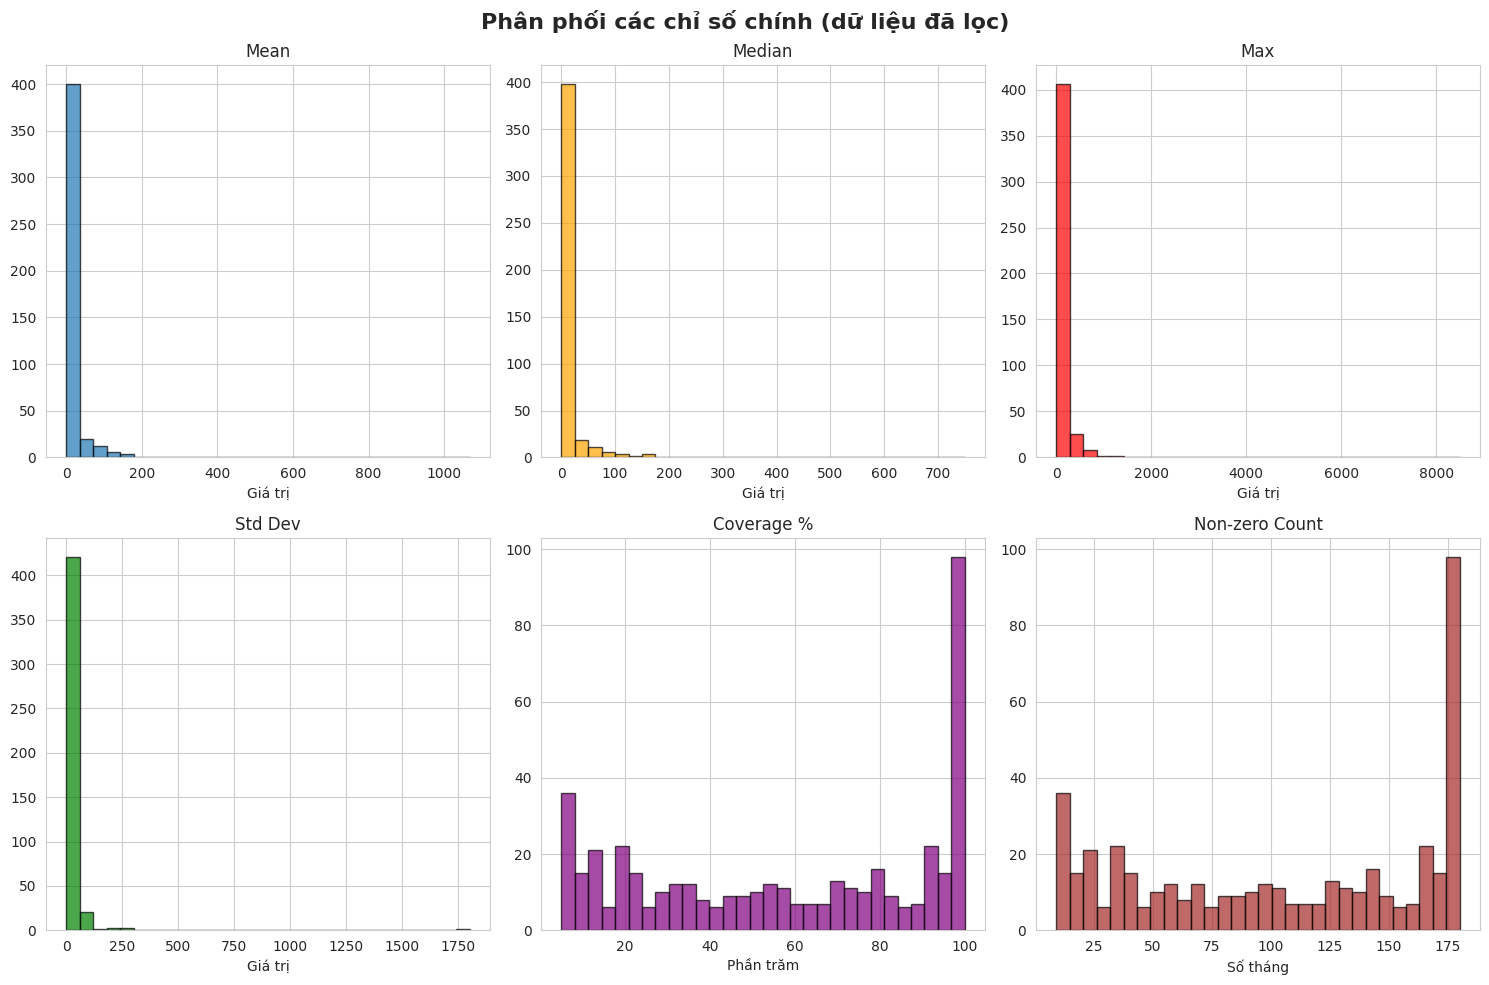

✓ Số điểm phân tích: 448
✓ Tất cả điểm đều có dữ liệu > 1 tháng


In [59]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Phân phối các chỉ số chính (dữ liệu đã lọc)', fontsize=16, fontweight='bold')

df_active = df

axes[0, 0].hist(df_active['Mean'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Mean')
axes[0, 0].set_xlabel('Giá trị')

axes[0, 1].hist(df_active['Median'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Median')
axes[0, 1].set_xlabel('Giá trị')

axes[0, 2].hist(df_active['Max'], bins=30, edgecolor='black', alpha=0.7, color='red')
axes[0, 2].set_title('Max')
axes[0, 2].set_xlabel('Giá trị')

axes[1, 0].hist(df['Std Dev'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Std Dev')
axes[1, 0].set_xlabel('Giá trị')

axes[1, 1].hist(df['Coverage %'], bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('Coverage %')
axes[1, 1].set_xlabel('Phần trăm')

axes[1, 2].hist(df['Non-zero Count'], bins=30, edgecolor='black', alpha=0.7, color='brown')
axes[1, 2].set_title('Non-zero Count')
axes[1, 2].set_xlabel('Số tháng')

plt.tight_layout()
plt.show()

print(f"✓ Số điểm phân tích: {len(df_active)}")
print(f"✓ Tất cả điểm đều có dữ liệu > 1 tháng")

## 4. Top 20 Điểm Du Lịch Theo Mean

🏆 Top 20 điểm du lịch theo Mean:
          Destination         Mean          Max  Coverage %
897          Lam Kinh  1067.921986  8500.000000  100.000000
849           Bình An   807.656986  1700.000000  100.000000
730          Phú Quốc   643.394484  1300.000000   98.888889
100            Hồ Tây   400.804520  1200.000000  100.000000
375        Đồng Thông   334.366562  1000.000000  100.000000
647  Thành phố Hà Nội   286.560800  1733.333333  100.000000
777      Phượng Hoàng   176.851879   833.333333  100.000000
628             Ba Vì   175.048899   500.000000  100.000000
941           Tam Đảo   151.717730   375.000000  100.000000
869            Mũi Né   143.361527   550.000000  100.000000
428           Côn Đảo   131.021875   400.000000  100.000000
492            Cát Bà   128.394879   625.000000  100.000000
261            Sơn Mỹ   120.073492   700.000000  100.000000
183          Vũ Quang   114.466964   633.333333  100.000000
486        Sông Hương   108.788447   433.333333  100.000000
911    

🏆 Top 20 điểm du lịch theo Mean:
          Destination         Mean          Max  Coverage %
897          Lam Kinh  1067.921986  8500.000000  100.000000
849           Bình An   807.656986  1700.000000  100.000000
730          Phú Quốc   643.394484  1300.000000   98.888889
100            Hồ Tây   400.804520  1200.000000  100.000000
375        Đồng Thông   334.366562  1000.000000  100.000000
647  Thành phố Hà Nội   286.560800  1733.333333  100.000000
777      Phượng Hoàng   176.851879   833.333333  100.000000
628             Ba Vì   175.048899   500.000000  100.000000
941           Tam Đảo   151.717730   375.000000  100.000000
869            Mũi Né   143.361527   550.000000  100.000000
428           Côn Đảo   131.021875   400.000000  100.000000
492            Cát Bà   128.394879   625.000000  100.000000
261            Sơn Mỹ   120.073492   700.000000  100.000000
183          Vũ Quang   114.466964   633.333333  100.000000
486        Sông Hương   108.788447   433.333333  100.000000
911    

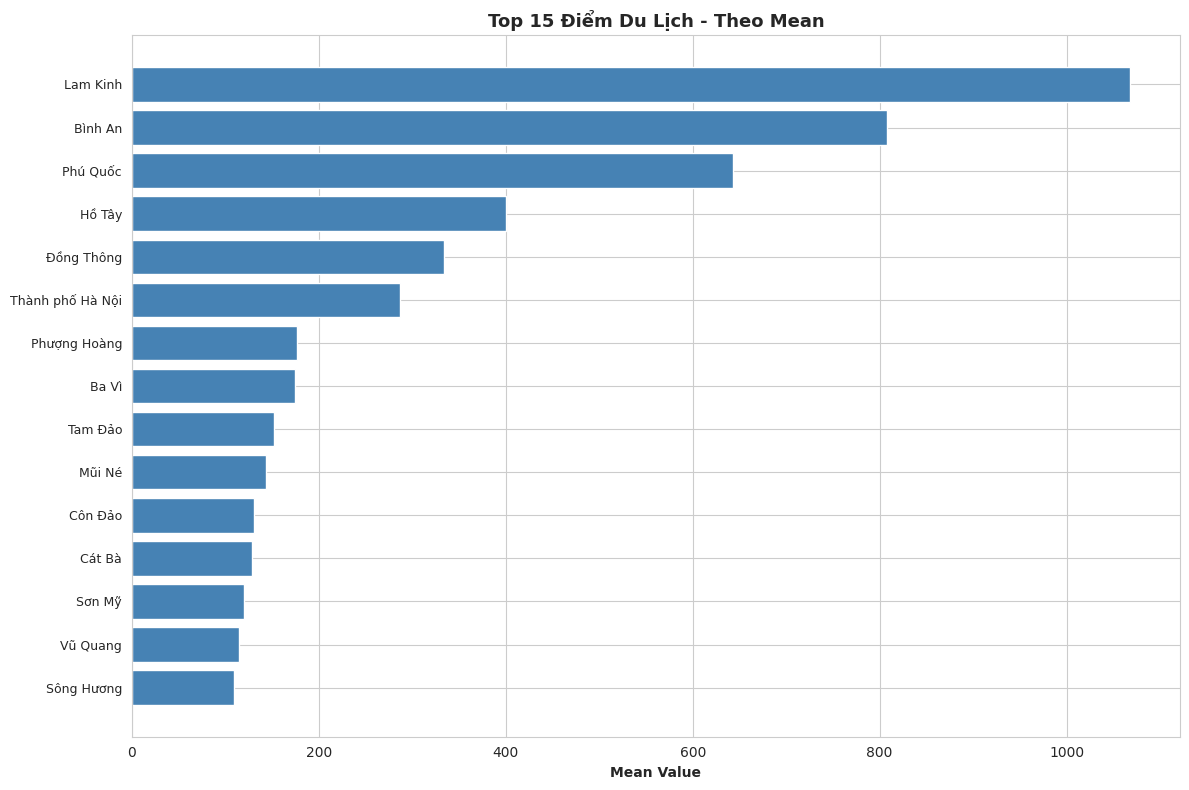

In [60]:
top_mean = df.nlargest(20, 'Mean')[['Destination', 'Mean', 'Max', 'Coverage %']]
print("🏆 Top 20 điểm du lịch theo Mean:")
print(top_mean.to_string())

# Biểu đồ
fig, ax = plt.subplots(figsize=(12, 8))
top_mean_plot = df.nlargest(15, 'Mean')
ax.barh(range(len(top_mean_plot)), top_mean_plot['Mean'], color='steelblue')
ax.set_yticks(range(len(top_mean_plot)))
ax.set_yticklabels(top_mean_plot['Destination'], fontsize=9)
ax.set_xlabel('Mean Value', fontweight='bold')
ax.set_title('Top 15 Điểm Du Lịch - Theo Mean', fontweight='bold', fontsize=13)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## 5. Phân Tích Mùa Vụ Theo Tháng & Mùa
Phát hiện địa điểm có traffic tăng đột biến vào một số tháng hoặc mùa so với mức trung bình.

### 5.1 Chuẩn Bị Dữ Liệu Normalized
Tải dữ liệu normalized (theo tháng) để phân tích mùa vụ.

In [61]:
# Load dữ liệu normalized để phân tích pattern hàng tháng
try:
    df_normalized = pd.read_csv('complete_destinations_normalized.csv')
    print("✅ Tải dữ liệu normalized thành công")
    print(f"   Shape: {df_normalized.shape}")
    print(f"   Cột date: {df_normalized.columns[0]}")
    print(f"\n📅 Preview dữ liệu normalized:")
    print(df_normalized.head())
except Exception as e:
    print(f"⚠️  Không tìm thấy file normalized: {e}")
    df_normalized = None

✅ Tải dữ liệu normalized thành công
   Shape: (180, 969)
   Cột date: date

📅 Preview dữ liệu normalized:
         date  Chợ Trung tâm Ba Chẽ  Miếu Ông – Miếu Bà  Phố đi bộ Tiên Yên  \
0  thg 1 2011                   0.0                 0.0                 0.0   
1  thg 1 2012                   0.0                 0.0                 0.0   
2  thg 1 2013                   0.0                 0.0                 0.0   
3  thg 1 2014                   0.0                 0.0                 0.0   
4  thg 1 2015                   0.0                 0.0                 0.0   

   căn cứ địa cách mạng Hải Chi  Văn hóa, Thể thao các dân tộc vùng Đông Bắc  \
0                           0.0                                          0.0   
1                           0.0                                          0.0   
2                           0.0                                          0.0   
3                           0.0                                          0.0   
4                  

### 5.2 Lọc Các Địa Điểm Có Mùa Vụ Mạnh
Tập trung vào các địa điểm có mùa vụ rõ rệt theo ngưỡng mạnh hơn và xuất kết quả phục vụ vận hành/marketing.

🎯 SIẾT CHẶT: Chỉ lấy địa điểm có mùa vụ ĐÃ CHỨNG MINH MẠNH MẼ
Số địa điểm đạt tiêu chí: 117 / 448

Ngưỡng siết chặt:
  ✓ Amplitude (đỉnh/đáy median) ≥ 2.5
  ✓ CV (độ biến thiên) ≥ 0.35
  ✓ Số tháng nổi bật ≥ 2
  ✓ Số tháng có đủ coverage ≥ 10
  ✓ YÊU CẦU: Phải có (Amplitude cao + Nhiều tháng) HOẶC (CV cao + Nhiều tháng)


🎯 SIẾT CHẶT: Chỉ lấy địa điểm có mùa vụ ĐÃ CHỨNG MINH MẠNH MẼ
Số địa điểm đạt tiêu chí: 117 / 448

Ngưỡng siết chặt:
  ✓ Amplitude (đỉnh/đáy median) ≥ 2.5
  ✓ CV (độ biến thiên) ≥ 0.35
  ✓ Số tháng nổi bật ≥ 2
  ✓ Số tháng có đủ coverage ≥ 10
  ✓ YÊU CẦU: Phải có (Amplitude cao + Nhiều tháng) HOẶC (CV cao + Nhiều tháng)


,Destination,Primary_Peak_Month,Seasonal_Months_Clustered,Num_Strong_Months,Amplitude (Median Peak/Trough),CV (std/median of months),Coverage OK Months
68,Chùa Phật Tích,2,"1–3, 11",4,16.551724,2.044977,12
55,Chùa Hương Tích,2,1–3,3,16.250000,2.032044,12
189,Khởi nghĩa Yên Thế,3,2–6,5,13.463704,2.058869,12
182,Hội Lim,2,"1–3, 11–12",5,11.200000,1.451856,12
414,Đền Mẫu,2,1–3,3,10.687500,1.589854,12
389,Đèo Ngang,10,"1, 9–12",5,10.166667,1.715341,12
118,Công viên Hồ Tây,6,4–9,6,10.021053,0.945963,12
58,Chùa Keo,2,"1–2, 10–11",4,8.157895,0.960235,12
49,Chùa Dâu,2,1–3,3,7.680000,1.259291,12
46,Chùa Cao Linh,2,1–3,3,7.640383,1.108303,12


🎯 SIẾT CHẶT: Chỉ lấy địa điểm có mùa vụ ĐÃ CHỨNG MINH MẠNH MẼ
Số địa điểm đạt tiêu chí: 117 / 448

Ngưỡng siết chặt:
  ✓ Amplitude (đỉnh/đáy median) ≥ 2.5
  ✓ CV (độ biến thiên) ≥ 0.35
  ✓ Số tháng nổi bật ≥ 2
  ✓ Số tháng có đủ coverage ≥ 10
  ✓ YÊU CẦU: Phải có (Amplitude cao + Nhiều tháng) HOẶC (CV cao + Nhiều tháng)


,Destination,Primary_Peak_Month,Seasonal_Months_Clustered,Num_Strong_Months,Amplitude (Median Peak/Trough),CV (std/median of months),Coverage OK Months
68,Chùa Phật Tích,2,"1–3, 11",4,16.551724,2.044977,12
55,Chùa Hương Tích,2,1–3,3,16.250000,2.032044,12
189,Khởi nghĩa Yên Thế,3,2–6,5,13.463704,2.058869,12
182,Hội Lim,2,"1–3, 11–12",5,11.200000,1.451856,12
414,Đền Mẫu,2,1–3,3,10.687500,1.589854,12
389,Đèo Ngang,10,"1, 9–12",5,10.166667,1.715341,12
118,Công viên Hồ Tây,6,4–9,6,10.021053,0.945963,12
58,Chùa Keo,2,"1–2, 10–11",4,8.157895,0.960235,12
49,Chùa Dâu,2,1–3,3,7.680000,1.259291,12
46,Chùa Cao Linh,2,1–3,3,7.640383,1.108303,12


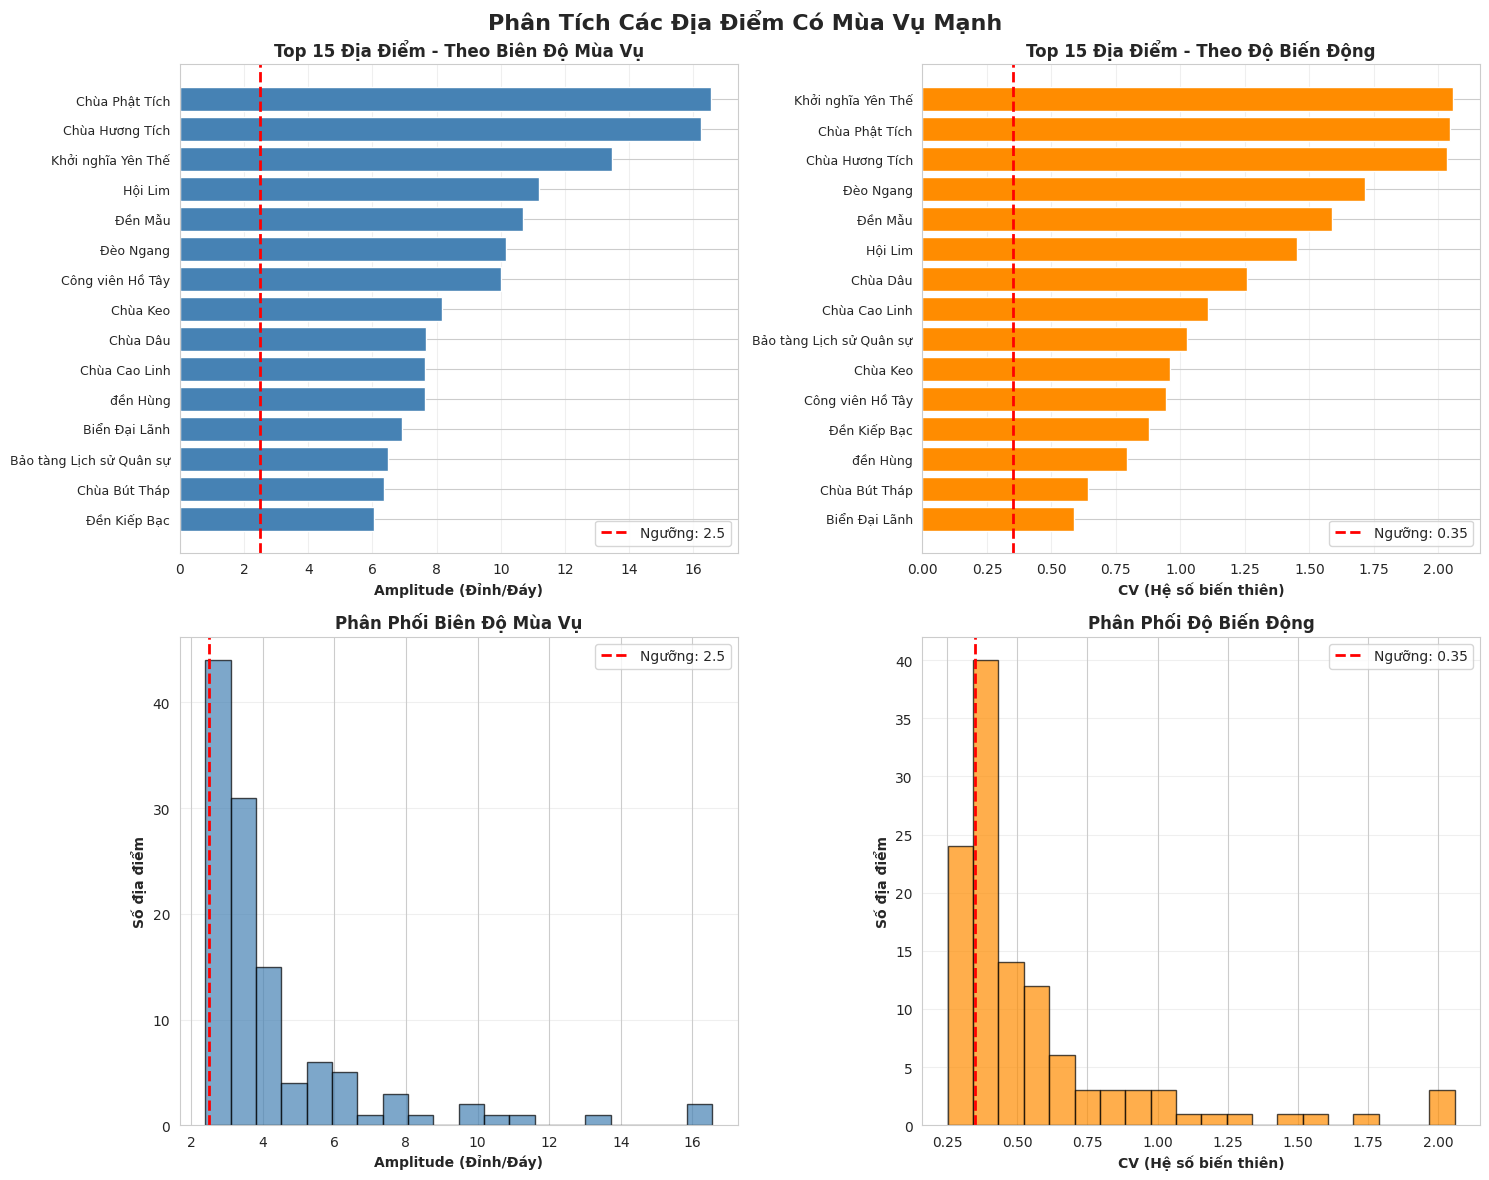

🎯 SIẾT CHẶT: Chỉ lấy địa điểm có mùa vụ ĐÃ CHỨNG MINH MẠNH MẼ
Số địa điểm đạt tiêu chí: 117 / 448

Ngưỡng siết chặt:
  ✓ Amplitude (đỉnh/đáy median) ≥ 2.5
  ✓ CV (độ biến thiên) ≥ 0.35
  ✓ Số tháng nổi bật ≥ 2
  ✓ Số tháng có đủ coverage ≥ 10
  ✓ YÊU CẦU: Phải có (Amplitude cao + Nhiều tháng) HOẶC (CV cao + Nhiều tháng)


,Destination,Primary_Peak_Month,Seasonal_Months_Clustered,Num_Strong_Months,Amplitude (Median Peak/Trough),CV (std/median of months),Coverage OK Months
68,Chùa Phật Tích,2,"1–3, 11",4,16.551724,2.044977,12
55,Chùa Hương Tích,2,1–3,3,16.250000,2.032044,12
189,Khởi nghĩa Yên Thế,3,2–6,5,13.463704,2.058869,12
182,Hội Lim,2,"1–3, 11–12",5,11.200000,1.451856,12
414,Đền Mẫu,2,1–3,3,10.687500,1.589854,12
389,Đèo Ngang,10,"1, 9–12",5,10.166667,1.715341,12
118,Công viên Hồ Tây,6,4–9,6,10.021053,0.945963,12
58,Chùa Keo,2,"1–2, 10–11",4,8.157895,0.960235,12
49,Chùa Dâu,2,1–3,3,7.680000,1.259291,12
46,Chùa Cao Linh,2,1–3,3,7.640383,1.108303,12


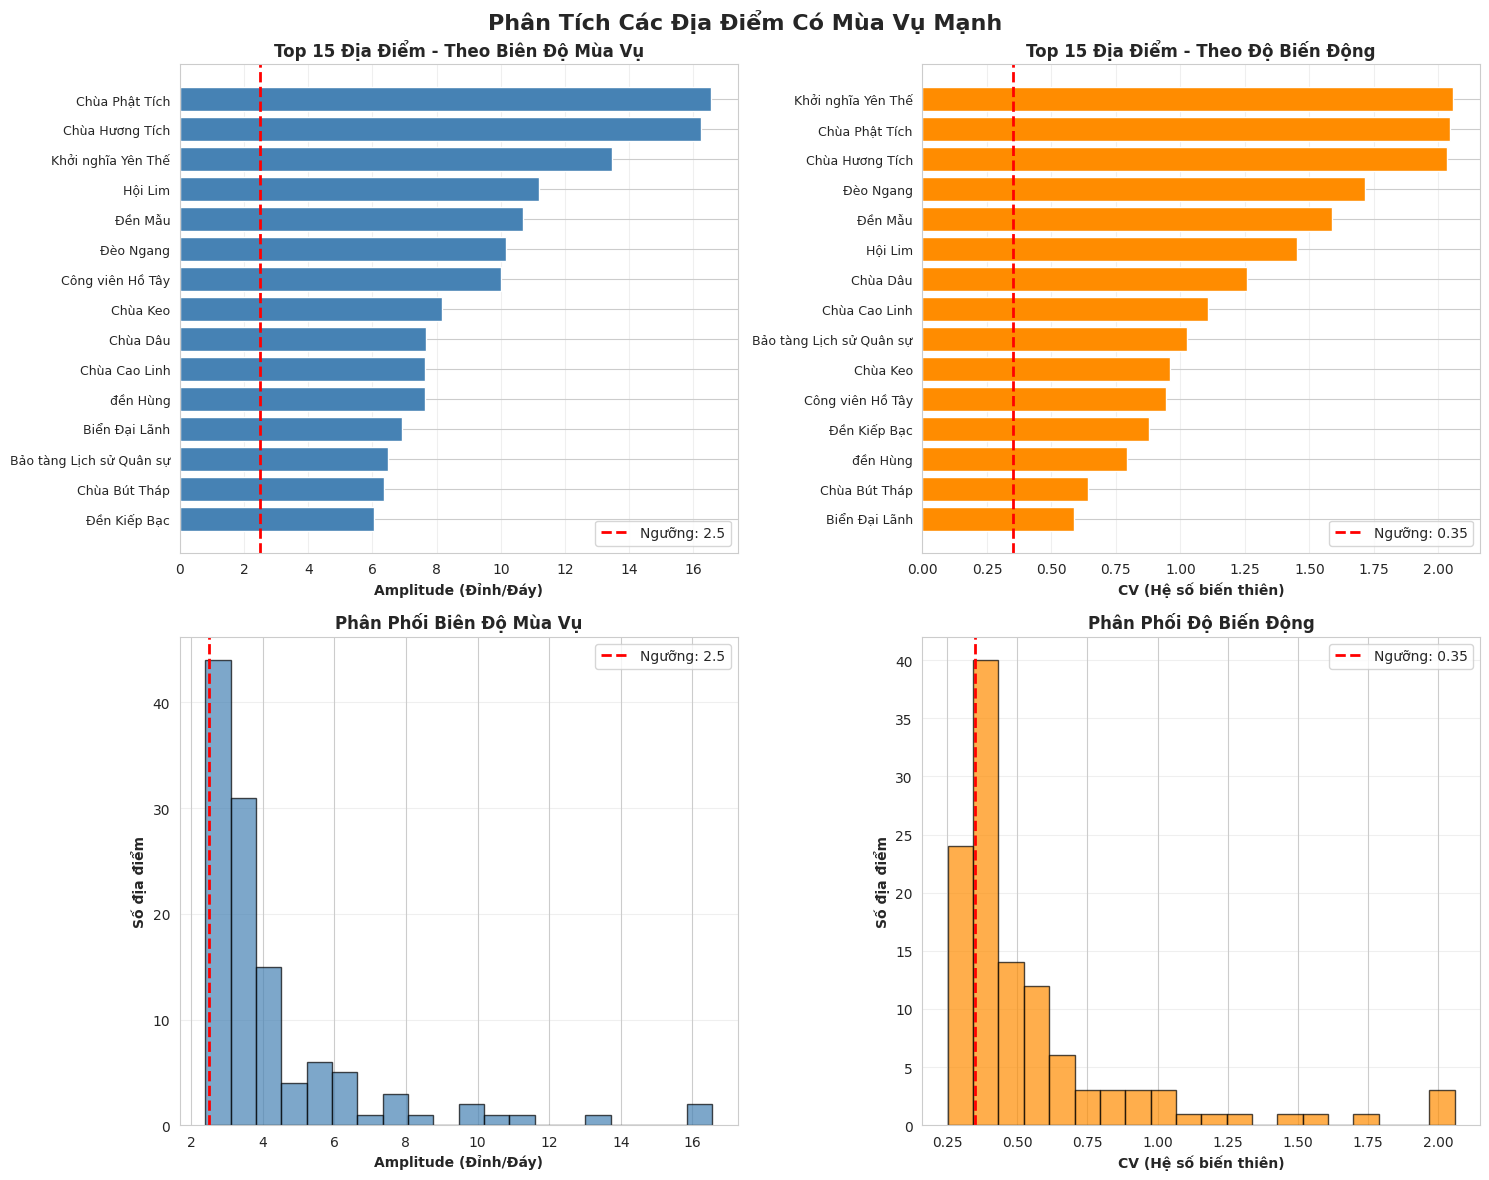

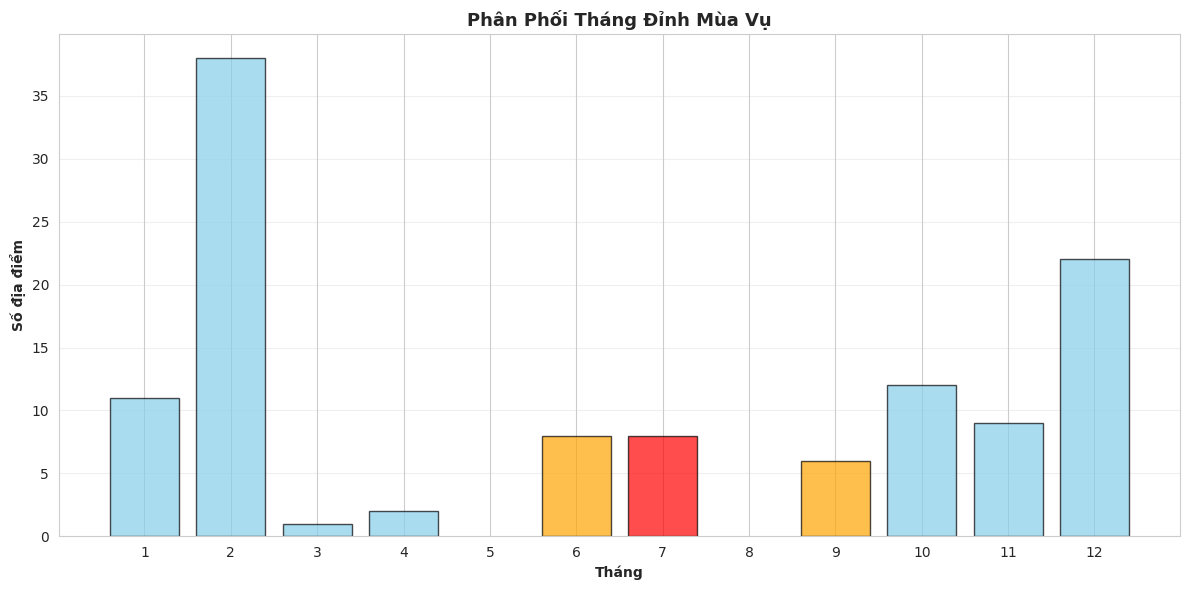


📊 Giải thích biểu đồ:
  • Top 15 theo Amplitude: Địa điểm có chênh lệch đỉnh/đáy cao nhất
  • Top 15 theo CV: Địa điểm có biến động lớn nhất
  • Phân phối Amplitude & CV: Thấy rõ phân bố các chỉ số
  • Tháng đỉnh: Xem tháng nào nhiều địa điểm có peak nhất

💾 Đã lưu bảng mùa vụ mạnh (đã siết chặt) vào: seasonal_destinations_strong.csv
📊 Chi tiết: 117 địa điểm có tính mùa vụ được chứng minh rõ rệt


In [62]:
# Lọc và tập trung vào các địa điểm có mùa vụ mạnh - ĐÃ SIẾT CHẶT
try:
    seasonality_df
except NameError:
    seasonality_df = None
    
if seasonality_df is None:
    print("⚠️ Vui lòng chạy xong các cell 5.1–5.3 để tạo `seasonality_df`.")
else:
    # Ngưỡng 'mạnh' (ĐÃ TĂNG MẠNH để chỉ lấy địa điểm có mùa vụ rất rõ rệt)
    STRONG_AMPLITUDE_MIN = 2.5      # đỉnh/đáy (median-based) tối thiểu - TĂNG TỪ 1.8 LÊN 2.5
    STRONG_CV_MIN = 0.35            # độ biến thiên theo median tối thiểu - TĂNG TỪ 0.25 LÊN 0.35
    MIN_STRONG_MONTHS = 2           # tối thiểu số tháng nổi bật (>=1.2x)
    MIN_COVERAGE_OK_MONTHS = 10     # tối thiểu số tháng có đủ coverage theo năm - YÊU CẦU MỚI
    MIN_YEARS_DATA = 2              # yêu cầu dữ liệu từ ít nhất 2 năm - YÊU CẦU MỚI (cần thêm data)
    FOCUS_TOP_N = 50                # số lượng điểm ưu tiên hiển thị
    
    def parse_months(text):
        if not isinstance(text, str) or text.strip() == '-' or text.strip() == '':
            return []
        return sorted({int(x) for x in text.replace('Th','').replace(' ','').split(',') if x.isdigit()})
    
    def cluster_consecutive(months):
        if not months: return '-'
        months = sorted(months)
        clusters = []
        start = months[0]
        prev = months[0]
        for m in months[1:]:
            if m == prev + 1:
                prev = m
            else:
                clusters.append((start, prev))
                start = m
                prev = m
        clusters.append((start, prev))
        def fmt(a,b):
            return f"{a}" if a==b else f"{a}–{b}"
        return ", ".join(fmt(a,b) for a,b in clusters)
    
    df_focus = seasonality_df.copy()
    df_focus['Peak_Months_List'] = df_focus['Peak_Months'].apply(parse_months)
    df_focus['Num_Strong_Months'] = df_focus['Peak_Months_List'].apply(len)
    df_focus['Seasonal_Months_Clustered'] = df_focus['Peak_Months_List'].apply(cluster_consecutive)
    
    # Điều kiện mạnh HƠN: có flag 'Có' + biên độ/biến thiên cao + đủ coverage tháng
    # LOẠI BỎ điều kiện "hoặc", chỉ giữ lại các địa điểm đáp ứng ĐỒNG THỜI nhiều tiêu chí
    strong_mask = (
        (df_focus['Có mùa vụ?'] == 'Có') & 
        (
            # Điều kiện 1: Amplitude cao VÀ nhiều tháng nổi bật
            ((df_focus['Amplitude (Median Peak/Trough)'] >= STRONG_AMPLITUDE_MIN) & 
             (df_focus['Num_Strong_Months'] >= MIN_STRONG_MONTHS)) |
            
            # Điều kiện 2: CV cao VÀ nhiều tháng nổi bật
            ((df_focus['CV (std/median of months)'] >= STRONG_CV_MIN) & 
             (df_focus['Num_Strong_Months'] >= MIN_STRONG_MONTHS))
        ) &
        # YÊU CẦU: Phải có đủ coverage tháng (chứng minh qua nhiều chu kỳ)
        (df_focus['Coverage OK Months'] >= MIN_COVERAGE_OK_MONTHS)
    )
    
    seasonality_strong = df_focus[strong_mask].sort_values(
        ['Amplitude (Median Peak/Trough)', 'CV (std/median of months)'], ascending=[False, False])
    
    print("🎯 SIẾT CHẶT: Chỉ lấy địa điểm có mùa vụ ĐÃ CHỨNG MINH MẠNH MẼ")
    print(f"Số địa điểm đạt tiêu chí: {len(seasonality_strong)} / {len(df_focus)}")
    print(f"\nNgưỡng siết chặt:")
    print(f"  ✓ Amplitude (đỉnh/đáy median) ≥ {STRONG_AMPLITUDE_MIN}")
    print(f"  ✓ CV (độ biến thiên) ≥ {STRONG_CV_MIN}")
    print(f"  ✓ Số tháng nổi bật ≥ {MIN_STRONG_MONTHS}")
    print(f"  ✓ Số tháng có đủ coverage ≥ {MIN_COVERAGE_OK_MONTHS}")
    print(f"  ✓ YÊU CẦU: Phải có (Amplitude cao + Nhiều tháng) HOẶC (CV cao + Nhiều tháng)")
    
    display(seasonality_strong.head(FOCUS_TOP_N)[[
        'Destination',
        'Primary_Peak_Month',
        'Seasonal_Months_Clustered',
        'Num_Strong_Months',
        'Amplitude (Median Peak/Trough)',
        'CV (std/median of months)',
        'Coverage OK Months'
    ]])
    
    # ===== BIỂU ĐỒ PHÂN TÍCH MÙA VỤ =====
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Phân Tích Các Địa Điểm Có Mùa Vụ Mạnh', fontsize=16, fontweight='bold')
    
    # 1. Top 15 địa điểm theo Amplitude
    top_amplitude = seasonality_strong.head(15).sort_values('Amplitude (Median Peak/Trough)')
    ax = axes[0, 0]
    ax.barh(range(len(top_amplitude)), top_amplitude['Amplitude (Median Peak/Trough)'], color='steelblue')
    ax.set_yticks(range(len(top_amplitude)))
    ax.set_yticklabels(top_amplitude['Destination'], fontsize=9)
    ax.set_xlabel('Amplitude (Đỉnh/Đáy)', fontweight='bold')
    ax.set_title('Top 15 Địa Điểm - Theo Biên Độ Mùa Vụ', fontweight='bold')
    ax.axvline(STRONG_AMPLITUDE_MIN, color='red', linestyle='--', linewidth=2, label=f'Ngưỡng: {STRONG_AMPLITUDE_MIN}')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='x')
    
    # 2. Top 15 địa điểm theo CV
    top_cv = seasonality_strong.head(15).sort_values('CV (std/median of months)')
    ax = axes[0, 1]
    ax.barh(range(len(top_cv)), top_cv['CV (std/median of months)'], color='darkorange')
    ax.set_yticks(range(len(top_cv)))
    ax.set_yticklabels(top_cv['Destination'], fontsize=9)
    ax.set_xlabel('CV (Hệ số biến thiên)', fontweight='bold')
    ax.set_title('Top 15 Địa Điểm - Theo Độ Biến Động', fontweight='bold')
    ax.axvline(STRONG_CV_MIN, color='red', linestyle='--', linewidth=2, label=f'Ngưỡng: {STRONG_CV_MIN}')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='x')
    
    # 3. Phân phối Amplitude
    ax = axes[1, 0]
    ax.hist(seasonality_strong['Amplitude (Median Peak/Trough)'], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
    ax.axvline(STRONG_AMPLITUDE_MIN, color='red', linestyle='--', linewidth=2, label=f'Ngưỡng: {STRONG_AMPLITUDE_MIN}')
    ax.set_xlabel('Amplitude (Đỉnh/Đáy)', fontweight='bold')
    ax.set_ylabel('Số địa điểm', fontweight='bold')
    ax.set_title('Phân Phối Biên Độ Mùa Vụ', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    # 4. Phân phối CV
    ax = axes[1, 1]
    ax.hist(seasonality_strong['CV (std/median of months)'], bins=20, edgecolor='black', alpha=0.7, color='darkorange')
    ax.axvline(STRONG_CV_MIN, color='red', linestyle='--', linewidth=2, label=f'Ngưỡng: {STRONG_CV_MIN}')
    ax.set_xlabel('CV (Hệ số biến thiên)', fontweight='bold')
    ax.set_ylabel('Số địa điểm', fontweight='bold')
    ax.set_title('Phân Phối Độ Biến Động', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # ===== BIỂU ĐỒ THÁNG ĐỈNH =====
    fig, ax = plt.subplots(figsize=(12, 6))
    peak_months_count = seasonality_strong['Primary_Peak_Month'].value_counts().sort_index()
    colors = ['red' if m in [7, 8] else 'orange' if m in [5, 6, 9] else 'skyblue' for m in peak_months_count.index]
    ax.bar(peak_months_count.index, peak_months_count.values, color=colors, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Tháng', fontweight='bold')
    ax.set_ylabel('Số địa điểm', fontweight='bold')
    ax.set_title('Phân Phối Tháng Đỉnh Mùa Vụ', fontweight='bold', fontsize=13)
    ax.set_xticks(range(1, 13))
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Giải thích biểu đồ:")
    print(f"  • Top 15 theo Amplitude: Địa điểm có chênh lệch đỉnh/đáy cao nhất")
    print(f"  • Top 15 theo CV: Địa điểm có biến động lớn nhất")
    print(f"  • Phân phối Amplitude & CV: Thấy rõ phân bố các chỉ số")
    print(f"  • Tháng đỉnh: Xem tháng nào nhiều địa điểm có peak nhất")
    
    # Xuất CSV để dùng ngoài notebook
    out_path = 'seasonal_destinations_strong.csv'
    seasonality_strong.to_csv(out_path, index=False)
    print(f"\n💾 Đã lưu bảng mùa vụ mạnh (đã siết chặt) vào: {out_path}")
    print(f"📊 Chi tiết: {len(seasonality_strong)} địa điểm có tính mùa vụ được chứng minh rõ rệt")